# Pymaceuticals Inc.
---

### Analysis

•	Two sets of data, Mouse_metadata and Study_results, were merged based on Mouse ID and Timepoint data to eliminate duplicate entries. This process resulted in a clean dataset ready for the study.

•	 Summary statistics were calculated for each drug regimen, including the mean, median, variance, standard deviation, and standard error of the mean (SEM) of tumor volume. Notably, mice treated with the Ramicane regimen exhibited the lowest mean tumor volume, around 40 mm^3, while those treated with Ketapril had the highest tumor volume, approximately 55 mm^3. Ramicane also displayed the highest variance and SEM compared to Ketapril, which had the lowest. 

•	A bar chart was created to display the total number of observations (Mouse ID/Timepoints) for each drug regimen. The data showed that the Capomulin regimen had the highest number of mouse-timepoint observations, while the Propriva regimen had the lowest.

•	A pie chart illustrated the distribution of female and male mice in the study. It revealed that 51% of the total mice were male, while 49% were female.

•	A boxplot graph depicted the distribution of final tumor volumes for mice in the most promising treatment regimens. Infubinol and Ceftamin treatments appeared to result in higher final tumor volumes compared to Capomulin and Ramicane. It's worth noting that the presence of outliers in the Infubinol treatment group could potentially affect the distribution.

•	A scatter plot with a linear regression line was created to visualize the relationship between mouse weight and the average observed tumor volume within the Capomulin treatment group. The strong correlation (approximately 0.84) between mouse weight and average tumor volume was evident. The linear regression model displayed a line with a slope close to 1, which is consistent with this strong correlation.

 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata,on="Mouse ID")

# Display the data table for preview
combined_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Checking the number of mice.
len(combined_data['Mouse ID'].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse_time = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
dup_mice = dup_mouse_time['Mouse ID'].unique()
dup_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_id = combined_data[combined_data['Mouse ID'] == 'g989']
duplicate_mouse_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID. Reset_index of data.
clean_data_df = combined_data[combined_data['Mouse ID'] != 'g989']
clean_data_df = clean_data_df.reset_index(drop=True)
clean_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1875,m601,25,33.118756,1,Capomulin,Male,22,17
1876,m601,30,31.758275,1,Capomulin,Male,22,17
1877,m601,35,30.834357,1,Capomulin,Male,22,17
1878,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_data_df['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

#Calculate the mean of the tumor volume for each regimen
mean_tumor = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()

#Calculate the median of the tumor volume for each regimen
median_tumor = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()

#Calculate the variance of the tumor volume for each regimen
variance_tumor = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()

#Calculate the standard deviation of the tumor volume for each regimen
std_tumor = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()

#Calculate the SEM = Standard deviation / SQRT(number of samples) of the tumor volume for each regimen
count_data = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].count()
sqrt = np.sqrt(count_data)
SME_tumor = std_tumor/sqrt

# Create a DataFrame with columns for above calculation.
Statistics_summary = pd.DataFrame({"Mean Tumor Volume":mean_tumor,
                                 "Median Tumor Volume":median_tumor,
                                 "Tumor Volume Variance":variance_tumor,
                                 "Tumor Volume Std. Dev.":std_tumor,
                                 "Tumor Volume Std. Err.":SME_tumor})

# Display the DataFrame
Statistics_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_statistics_agg = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_statistics_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

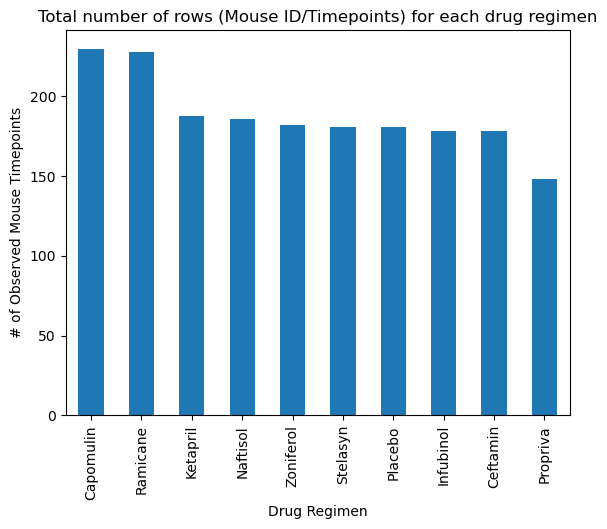

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Get total # of Observed Mouse Timepoints by Drug Regimen
tot_obs = clean_data_df["Drug Regimen"].value_counts()

# Configure plot, figsize, title, and axis labels
figure1 = tot_obs.plot(kind="bar", figsize=(6.5,5))
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Total number of rows (Mouse ID/Timepoints) for each drug regimen")

# Show plot
plt.show()

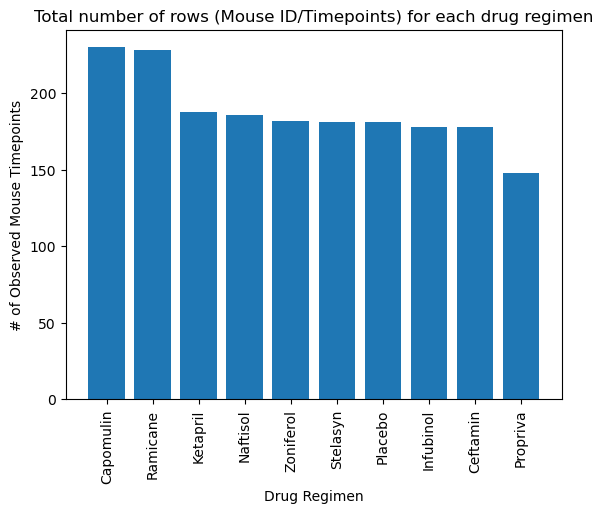

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Get total # of Observed Mouse Timepoints by Drug Regimen
tot_obs = clean_data_df["Drug Regimen"].value_counts()

# Set x axis and tick locations
x_axis = np.arange(len(tot_obs))
tick_locations = [value for value in x_axis]

# Create the Bar Chart 
plt.bar(x_axis, tot_obs, align="center")
plt.xticks(tick_locations, tot_obs.index, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Total number of rows (Mouse ID/Timepoints) for each drug regimen")

# Show plot
plt.show()

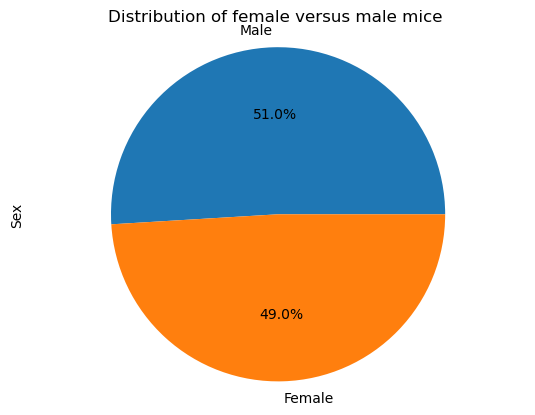

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Get total mice by sex
data = clean_data_df["Sex"].value_counts()

#Create the Pie chart with equal axes
branch_pie = data.plot(kind="pie", autopct='%1.1f%%')
plt.axis("equal")
plt.title("Distribution of female versus male mice ")
# Show plot
plt.show()

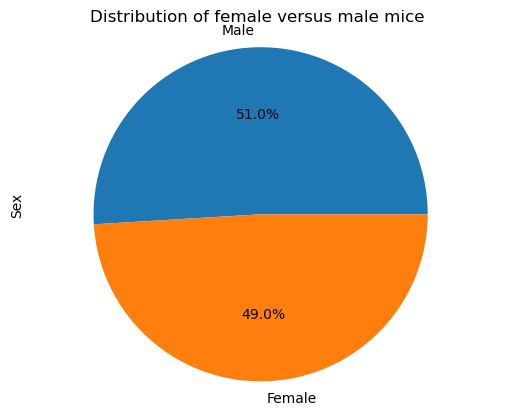

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Get total mice by sex
data = clean_data_df["Sex"].value_counts()
labels = ["Male", "Female"]

#Create the Pie chart with equal axes
plt.pie(data,autopct="%1.1f%%", labels=labels)
plt.axis("equal")
plt.text(-1.5, 0, 'Sex', fontsize=10, rotation=90)
plt.title("Distribution of female versus male mice ")

#Show plot
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
lasttimeout_df = clean_data_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_original_df = pd.merge(lasttimeout_df, clean_data_df, on = ["Mouse ID", "Timepoint"])
merged_original_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
list_drugregimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create a Data frame filtered by the values in the list
drugregimen_df = merged_original_df[merged_original_df['Drug Regimen'].isin(list_drugregimen)]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for regimen in list_drugregimen:
        regimen_vol = drugregimen_df[drugregimen_df['Drug Regimen'] == regimen]['Tumor Volume (mm3)']
        
    
    # add subset 
        tumor_volume_data.append(regimen_vol)
    
    # Determine outliers using upper and lower bounds
    
      # Calculate quartiles and IQR
        quartiles = regimen_vol.quantile([0.25, 0.75])
        lowerq = quartiles[0.25]
        upperq = quartiles[0.75]
        iqr = upperq - lowerq
    
      # Determine lower and upper bounds for outliers
        lower_bound = lowerq - 1.5 * iqr
        upper_bound = upperq + 1.5 * iqr
    
      # Identify potential outliers
        outliers = regimen_vol[(regimen_vol < lower_bound) | (regimen_vol > upper_bound)]
    
        print(f"{regimen}'s potential outliers for: {outliers}")

Capomulin's potential outliers for: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers for: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers for: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers for: Series([], Name: Tumor Volume (mm3), dtype: float64)


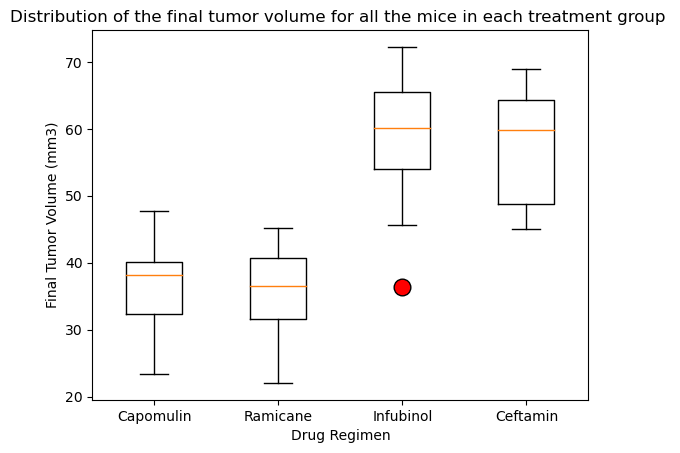

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
ax.boxplot(tumor_volume_data, labels=list_drugregimen, flierprops = dict(marker='o', markersize=12, markerfacecolor='red', markeredgecolor='black'))
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.set_xlabel('Drug Regimen')
plt.title("Distribution of the final tumor volume for all the mice in each treatment group ")

plt.show()

## Line and Scatter Plots

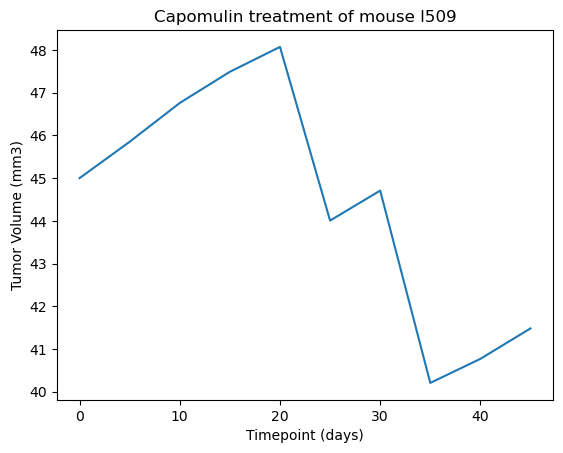

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

#create a variable with a single muse id 
mouse_id = "l509"

#Filter the data frame clean data besed on Capomulin treated and the single mouse 
treatment_mouse_df = clean_data_df[(clean_data_df['Drug Regimen'] == "Capomulin") & (clean_data_df['Mouse ID'] == mouse_id)]

#Create the line plot
plt.plot(treatment_mouse_df['Timepoint'], treatment_mouse_df['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin treatment of mouse {mouse_id}')

# Show plot
plt.show()

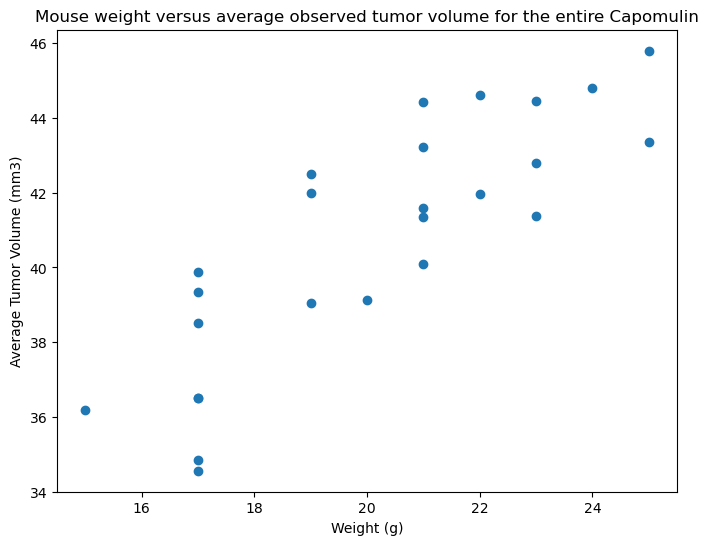

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

#Filter the data frame clean data besed on Capomulin treated
treatment_df = clean_data_df[clean_data_df['Drug Regimen'] == "Capomulin"]

#Group the data obtained by Mouse ID and Weight (g), calculate the average observed tumor volume
tumor_avg = treatment_df.groupby(["Mouse ID",  "Weight (g)"])['Tumor Volume (mm3)'].mean().reset_index()

#Create the scatter plot
x_values = tumor_avg['Weight (g)']
y_values = tumor_avg['Tumor Volume (mm3)']
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse weight versus average observed tumor volume for the entire Capomulin')

# Show plot
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84



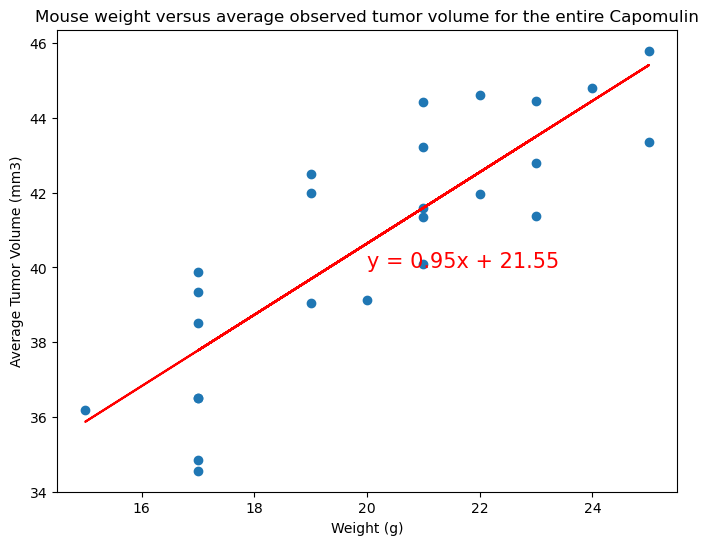

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

#Calculate the correlation coefficient
correlation = st.pearsonr(tumor_avg['Weight (g)'],tumor_avg['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}\n")

#Create the plot of the scatter and Linear regresion model
x_values = tumor_avg['Weight (g)']
y_values = tumor_avg['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse weight versus average observed tumor volume for the entire Capomulin')

# Show plot
plt.show()